In [1]:
import os
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras import Sequential
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
filename = os.listdir('train/final_train')
category = []
for i in filename:
    if i in os.listdir('train/final_with_mask'):
        category.append('with_mask')
    else:
        category.append('without_mask')


In [3]:
train = pd.DataFrame({'filename':filename,'category':category})
train.head(10)

,filename,category
0,without_mask1641.jpg,without_mask
1,without_mask49.jpg,without_mask
2,with_mask609.jpg,with_mask
3,without_mask1427.jpg,without_mask
4,623with_mask.jpg,with_mask
5,with_mask1520.jpg,with_mask
6,with_mask347.jpg,with_mask
7,without_mask1538.jpg,without_mask
8,377with_mask.jpg,with_mask
9,605without_mask.jpg,without_mask


In [4]:
filename = os.listdir('test/final_test')
category = []
for i in filename:
    if i in os.listdir('test/with_mask'):
        category.append('with_mask')
    else:
        category.append('without_mask')

In [5]:
test = pd.DataFrame({'filename':filename,'category':category})
test.head(10)

,filename,category
0,208.jpg,without_mask
1,456-with-mask.jpg,with_mask
2,378.jpg,without_mask
3,62.jpg,without_mask
4,308-with-mask.jpg,with_mask
5,143.jpg,without_mask
6,306-with-mask.jpg,with_mask
7,231.jpg,without_mask
8,477.jpg,without_mask
9,444-with-mask.jpg,with_mask


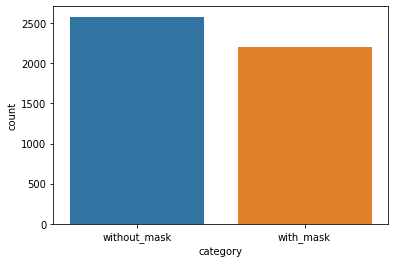

In [6]:
sns.countplot(x='category',data=train)

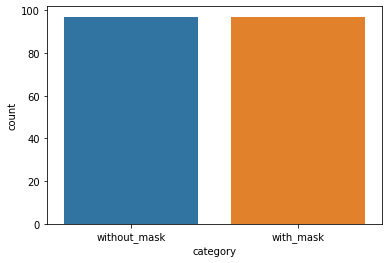

In [7]:
sns.countplot(x='category',data=test)

In [8]:
#x_train,x_test=train_test_split(data,test_size=0.2,random_state=0)

In [9]:
model=Sequential()
# initialising cnn

In [10]:

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train, 
    "train/final_train", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=5
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    test, 
    "test/final_test", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=5
)


Found 4775 validated image filenames belonging to 2 classes.
Found 194 validated image filenames belonging to 2 classes.


In [13]:
model.fit_generator(
    train_generator, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=test.shape[0]//5,
    steps_per_epoch=train.shape[0]//5
    #callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
955/955 [==============================] - 160s 167ms/step - loss: 0.6012 - accuracy: 0.7994 - val_loss: 1.8302 - val_accuracy: 0.5053
Epoch 2/30
955/955 [==============================] - 148s 155ms/step - loss: 0.4715 - accuracy: 0.8268 - val_loss: 1.4079 - val_accuracy: 0.6632
Epoch 3/30
955/955 [==============================] - 148s 154ms/step - loss: 0.4682 - accuracy: 0.8289 - val_loss: 0.1393 - val_accuracy: 0.9579
Epoch 4/30
955/955 [==============================] - 150s 157ms/step - loss: 0.4385 - accuracy: 0.8404 - val_loss: 0.1136 - val_accuracy: 0.9737
Epoch 5/30
955/955 [==============================] - 149s 156ms/step - loss: 0.4152 - accuracy: 0.8517 - val_loss: 0.3846 - val_accuracy: 0.8474
Epoch 6/30
955/955 [==============================] - 150s 157ms/step - loss: 0.4420 - accuracy: 0.8369 - val_loss: 0.1549 - val_accuracy: 0.9526
Epoch 7/30
955/955 [============================

In [14]:

detect = model.to_json()
with open('detect.json','w') as json_file:
    json_file.write(detect)
model.save_weights('detect.h5')